# **SISTEM REKOMENDASI PONSEL PINTAR BERDASARKAN PREFERENSI PENGGUNA**

- **Nama:** Sion Saut Parulian Pardosi
- **Email:** spardosi12@gmail.com
- **Email Dicoding:** mc114d5y1919@student.devacademy.id
- **ID Dicoding:** MC114D5Y1919

-- -

## **Deskripsi Proyek**

### **Deskripsi Latar Belakang Proyek**

Dengan pesatnya perkembangan teknologi, pasar ponsel pintar mengalami pertumbuhan yang signifikan dengan berbagai pilihan model yang tersedia. Konsumen sering menghadapi kesulitan dalam menentukan ponsel yang tepat karena banyaknya opsi yang ada. Kompleksitas spesifikasi teknis dan beragamnya fitur membuat proses pemilihan menjadi menantang, terutama bagi pengguna awam yang tidak memahami detail teknis.
Sistem rekomendasi merupakan solusi untuk berinteraksi dengan ruang informasi yang besar dan kompleks. Proyek ini mengembangkan sistem rekomendasi yang dapat menyederhanakan proses pemilihan ponsel dengan memberikan rekomendasi yang relevan berdasarkan preferensi dan kebutuhan pengguna. Dengan memanfaatkan data rating pengguna dan spesifikasi teknis ponsel, sistem ini diharapkan dapat membantu pengguna menemukan ponsel yang paling sesuai dengan kebutuhan mereka.

### **Tujuan Proyek**

- Mengembangkan sistem rekomendasi ponsel yang dapat memberikan saran berdasarkan preferensi pengguna
- Membantu pengguna menemukan ponsel yang mirip dengan perangkat sebelumnya
- Meningkatkan pengalaman pengguna dalam proses pemilihan ponsel
- Mengimplementasikan dua pendekatan: Content-Based Filtering dan Collaborative Filtering

## #

## 1. Import Library yang Dibutuhkan

Mengimpor semua library yang diperlukan untuk pengembangan sistem rekomendasi.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Import library untuk deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Import library untuk sistem file
from pathlib import Path
import os

# Pengaturan untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

## #

## 2. Data Understanding

#### Persiapan Dataset

Dataset yang digunakan terdiri dari 3 file CSV yang berisi informasi lengkap tentang ponsel, rating pengguna, dan profil pengguna.

In [5]:
# Menentukan path dataset
dataset_path = r"D:\PROJECT\DBS DICODING\machine learning terapan\sistem rekomendasi\Dicoding-ModelSistemRekomendasi-main\dataset"

# Memverifikasi keberadaan file
data_file = os.path.join(dataset_path, "cellphones data.csv")
rating_file = os.path.join(dataset_path, "cellphones ratings.csv")
users_file = os.path.join(dataset_path, "cellphones users.csv")

# Mengecek apakah file ada
files_to_check = [data_file, rating_file, users_file]
file_names = ["cellphones data.csv", "cellphones ratings.csv", "cellphones users.csv"]

print("Verifikasi keberadaan file:")
for file, name in zip(files_to_check, file_names):
    if os.path.exists(file):
        print(f"✓ {name} - Tersedia")
    else:
        print(f"✗ {name} - Tidak ditemukan")
        print(f"  Path yang dicari: {file}")

Verifikasi keberadaan file:
✓ cellphones data.csv - Tersedia
✓ cellphones ratings.csv - Tersedia
✓ cellphones users.csv - Tersedia


#### Membaca Dataset

In [6]:
try:
    # Membaca dataset dengan error handling
    print("Memuat dataset...")
    
    data = pd.read_csv(data_file)
    rating = pd.read_csv(rating_file)
    users = pd.read_csv(users_file)
    
    print("✓ Semua dataset berhasil dimuat!")
    print(f"✓ Data ponsel: {data.shape[0]} baris, {data.shape[1]} kolom")
    print(f"✓ Data rating: {rating.shape[0]} baris, {rating.shape[1]} kolom")
    print(f"✓ Data pengguna: {users.shape[0]} baris, {users.shape[1]} kolom")
    
except FileNotFoundError as e:
    print(f"Error: File tidak ditemukan - {e}")
    print("Pastikan path dataset sudah benar dan file tersedia")
except Exception as e:
    print(f"Error tidak terduga: {e}")

Memuat dataset...
✓ Semua dataset berhasil dimuat!
✓ Data ponsel: 33 baris, 14 kolom
✓ Data rating: 990 baris, 3 kolom
✓ Data pengguna: 99 baris, 4 kolom


#### Struktur Dataset

Dataset terbagi menjadi 3 komponen utama:

1. Cellphones Data (data.csv)

- Berisi spesifikasi lengkap dari 33 model ponsel
- Informasi meliputi brand, model, sistem operasi, dan spesifikasi teknis


2. Cellphones Ratings (rating.csv)

- Berisi 990 data rating yang diberikan pengguna terhadap ponsel
- Rating dalam skala 1-10


3. Cellphones Users (users.csv)

- Berisi profil 99 pengguna
- Informasi demografis seperti usia, gender, dan pekerjaan

In [7]:
# Menampilkan informasi detail dataset
print("=== INFORMASI DATASET PONSEL ===")
print(data.info())
print("\n=== SAMPLE DATA PONSEL ===")
print(data.head())

print("\n=== INFORMASI DATASET RATING ===")
print(rating.info())
print("\n=== SAMPLE DATA RATING ===")
print(rating.head())

print("\n=== INFORMASI DATASET PENGGUNA ===")
print(users.info())
print("\n=== SAMPLE DATA PENGGUNA ===")
print(users.head())

=== INFORMASI DATASET PONSEL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cellphone_id      33 non-null     int64  
 1   brand             33 non-null     object 
 2   model             33 non-null     object 
 3   operating system  33 non-null     object 
 4   internal memory   33 non-null     int64  
 5   RAM               33 non-null     int64  
 6   performance       33 non-null     float64
 7   main camera       33 non-null     int64  
 8   selfie camera     33 non-null     int64  
 9   battery size      33 non-null     int64  
 10  screen size       33 non-null     float64
 11  weight            33 non-null     int64  
 12  price             33 non-null     int64  
 13  release date      33 non-null     object 
dtypes: float64(2), int64(8), object(4)
memory usage: 3.7+ KB
None

=== SAMPLE DATA PONSEL ===
   cellphone_id  

Membaca file .csv dan menyimpannya pada suatu variabel.

In [9]:
import os

# Path ke folder dataset
dataset_path = r"D:\PROJECT\DBS DICODING\machine learning terapan\sistem rekomendasi\Dicoding-ModelSistemRekomendasi-main\dataset"

# Pindah ke direktori dataset
os.chdir(dataset_path)

# Mengubah nama file menggunakan os.rename()
try:
    os.rename("cellphones data.csv", "data.csv")
    print("✓ cellphones data.csv → data.csv")
except FileNotFoundError:
    print("⚠ File 'cellphones data.csv' tidak ditemukan atau sudah diubah")
except FileExistsError:
    print("⚠ File 'data.csv' sudah ada")

try:
    os.rename("cellphones ratings.csv", "rating.csv")
    print("✓ cellphones ratings.csv → rating.csv")
except FileNotFoundError:
    print("⚠ File 'cellphones ratings.csv' tidak ditemukan atau sudah diubah")
except FileExistsError:
    print("⚠ File 'rating.csv' sudah ada")

try:
    os.rename("cellphones users.csv", "users.csv")
    print("✓ cellphones users.csv → users.csv")
except FileNotFoundError:
    print("⚠ File 'cellphones users.csv' tidak ditemukan atau sudah diubah")
except FileExistsError:
    print("⚠ File 'users.csv' sudah ada")

# Hapus file zip jika ada
try:
    os.remove("dataset.zip")
    print("✓ dataset.zip dihapus")
except FileNotFoundError:
    print("⚠ File 'dataset.zip' tidak ditemukan")

print("\nFile berhasil diubah! Sekarang Anda bisa membaca dengan:")
print("data = pd.read_csv('data.csv')")
print("rating = pd.read_csv('rating.csv')")
print("users = pd.read_csv('users.csv')")

✓ cellphones data.csv → data.csv
✓ cellphones ratings.csv → rating.csv
✓ cellphones users.csv → users.csv
✓ dataset.zip dihapus

File berhasil diubah! Sekarang Anda bisa membaca dengan:
data = pd.read_csv('data.csv')
rating = pd.read_csv('rating.csv')
users = pd.read_csv('users.csv')


####

#### Menampilkan informasi dari dataset menggunakan .info()

In [10]:
#Menampilkan info dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cellphone_id      33 non-null     int64  
 1   brand             33 non-null     object 
 2   model             33 non-null     object 
 3   operating system  33 non-null     object 
 4   internal memory   33 non-null     int64  
 5   RAM               33 non-null     int64  
 6   performance       33 non-null     float64
 7   main camera       33 non-null     int64  
 8   selfie camera     33 non-null     int64  
 9   battery size      33 non-null     int64  
 10  screen size       33 non-null     float64
 11  weight            33 non-null     int64  
 12  price             33 non-null     int64  
 13  release date      33 non-null     object 
dtypes: float64(2), int64(8), object(4)
memory usage: 3.7+ KB


Output kode di atas memberikan informasi :
- Total baris ada 33
- Total kolom ada 14
- Terdapat 10 kolom bertipe data numerik
- Terdapat 4 kolom bertipe data object


####

#### Menampilkan 5 sampel teratas dari varibel data.

In [11]:
data.head()

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2025),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2025
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2025
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2025
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2025
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2025


####

#### Menampilkan informasi dari dataset menggunakan .info()

In [12]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       990 non-null    int64
 1   cellphone_id  990 non-null    int64
 2   rating        990 non-null    int64
dtypes: int64(3)
memory usage: 23.3 KB


Output kode di atas memberikan informasi :
- Total baris ada 990
- Total kolom ada 3
- Terdapat 3 kolom bertipe data numerik

####

#### Menampilkan 5 sampel teratas dari varibel rating.

In [13]:
rating.head()

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2


####

#### Menampilkan informasi dari dataset menggunakan .info()

In [14]:
#Menampilkan info dari dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     99 non-null     int64 
 1   age         99 non-null     int64 
 2   gender      99 non-null     object
 3   occupation  98 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


Output kode di atas memberikan informasi :
- Total baris ada 99
- Total kolom ada 4
- Terdapat 2 kolom bertipe data numerik
- Terdapat 2 kolom bertipe data object

####

#### Menampilkan 5 sampel teratas dari varibel users.

In [15]:
#Menampilkan isi dari variabel users
users.head()

,user_id,age,gender,occupation
0,0,38,Female,Data analyst
1,1,40,Female,team worker in it
2,6,55,Female,IT
3,8,25,Female,Manager
4,10,23,Male,worker


## Univariate Exploratory Data Analysis

## Overview
Dataset ini terdiri dari tiga file CSV yang berisi informasi mengenai ponsel, rating pengguna, dan profil pengguna untuk sistem rekomendasi ponsel.

## File Structure

### 📱 data.csv (Informasi Ponsel)
File ini berisi informasi detail mengenai spesifikasi dan karakteristik ponsel.

| Variabel | Tipe Data | Deskripsi |
|----------|-----------|-----------|
| `cellphone_id` | Integer | Identifikasi unik untuk setiap unit ponsel |
| `brand` | String | Nama merek atau brand ponsel |
| `model` | String | Tipe atau model spesifik ponsel |
| `operating_system` | String | Jenis sistem operasi yang digunakan |
| `internal_memory` | Integer | Kapasitas penyimpanan internal dalam satuan GB |
| `RAM` | Integer | Kapasitas memori akses acak dalam satuan GB |
| `performance` | Float | Nilai evaluasi performa ponsel |
| `main_camera` | Integer | Kualitas kamera belakang dalam satuan MP |
| `selfie_camera` | Integer | Kualitas kamera depan dalam satuan MP |
| `battery_size` | Integer | Daya tampung baterai dalam satuan mAh |
| `screen_size` | Float | Dimensi layar dalam satuan inci |
| `weight` | Integer | Bobot ponsel dalam satuan gram |
| `price` | Float | Nilai harga ponsel dalam mata uang USD |
| `release_date` | Date | Waktu peluncuran produk ponsel |

### ⭐ rating.csv (Penilaian Pengguna)
File ini berisi data rating yang diberikan pengguna terhadap ponsel tertentu.

| Variabel | Tipe Data | Deskripsi |
|----------|-----------|-----------|
| `user_id` | Integer | Kode identifikasi unik setiap pengguna |
| `cellphone_id` | Integer | Kode identifikasi unik ponsel (terhubung dengan data.csv) |
| `rating` | Integer | Nilai penilaian yang diberikan pengguna terhadap ponsel (rentang 1-10) |

### 👤 users.csv (Profil Pengguna)
File ini berisi informasi demografis pengguna.

| Variabel | Tipe Data | Deskripsi |
|----------|-----------|-----------|
| `user_id` | Integer | Kode identifikasi unik setiap pengguna |
| `age` | Integer | Umur pengguna |
| `gender` | String | Jenis kelamin pengguna |
| `occupation` | String | Profesi atau pekerjaan pengguna |

## Relationships

```
users.csv ──┐
            │
            ├─── user_id ─── rating.csv ─── cellphone_id ─── data.csv
            │
            └─── (One-to-Many relationship)
```

- **users.csv** dan **rating.csv** terhubung melalui `user_id`
- **rating.csv** dan **data.csv** terhubung melalui `cellphone_id`
- Satu pengguna dapat memberikan rating untuk beberapa ponsel
- Satu ponsel dapat memiliki rating dari beberapa pengguna

## **Dataset Data**

#### Menampilkan satu contoh dari dataset data

In [16]:
#Menampilkan satu contoh
data.head(1)

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2025),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2025


#### 

#### Menghitung jumlah cellphone masing-masing brand dan menampilkan grafik.

Jumlah brand:  10
brand
Samsung     8
Apple       6
OnePlus     4
Xiaomi      4
Motorola    4
Google      3
Asus        1
Oppo        1
Vivo        1
Sony        1
Name: count, dtype: int64


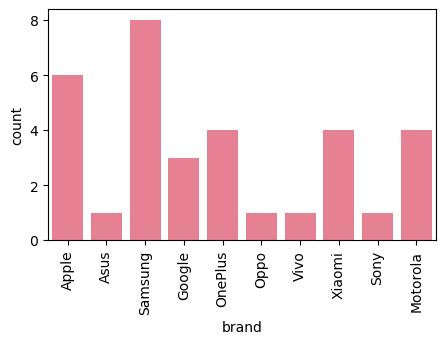

In [17]:
#Menghitung jumlah brand
print('Jumlah brand: ',len(data.brand.unique()))

#Menghitung jumlah cellphone masing-masing brand
brand_counts = data['brand'].value_counts()
print(brand_counts)

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['brand'])
plt.xticks(rotation=90)
plt.show()

Output kode di atas memberikan informasi :
- Terdapat 10 brand berbeda
- Brand dengan jumlah cellphone paling banyak adalah Samsung
- Brand dengan jumlah cellphone paling sedikit adalah Asus, Oppo, Vivo, dan Sony

#### 

#### Menampilkan jenis-jenis model cellphone.

In [18]:
#Menampilkan semua model cellphone
model_counts = data['model'].unique()
print('Jumlah model cellphone: ',len(model_counts))
model_counts

Jumlah model cellphone:  33


array(['iPhone SE (2025)', 'iPhone 13 Mini', 'iPhone 13', 'iPhone 13 Pro',
       'iPhone 13 Pro Max', 'iPhone XR', 'Zenfone 8', 'Galaxy A13',
       'Galaxy A32', 'Galaxy A53', 'Galaxy S22', 'Galaxy S22 Plus',
       'Galaxy S22 Ultra', 'Galaxy Z Flip 3', 'Galaxy Z Fold 3',
       'Pixel 6 \xa0', 'Pixel 6a', 'Pixel 6 Pro\xa0', 'Nord N20',
       'Nord 2T', '10 Pro', '10T', 'Find X5 Pro', 'X80 Pro',
       'Redmi Note 11', '11T Pro', '12 Pro', 'Poco F4', 'Xperia Pro',
       'Moto G Stylus (2025)', 'Moto G Play (2025)', 'Moto G Pure',
       'Moto G Power (2025)'], dtype=object)

Output kode di atas memberikan informasi :
- Terdapat 33 model cellphone berbeda

#### 

#### Menghitung jumlah operating system untuk masing-masing kategori.

operating system
Android    27
iOS         6
Name: count, dtype: int64


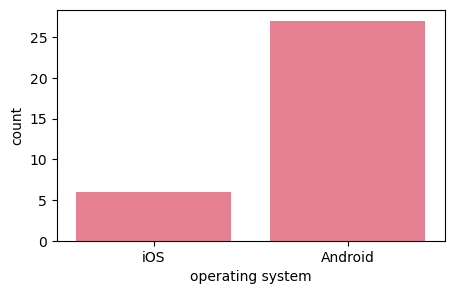

In [19]:
#Menghitung jumlah operating system
os_counts = data['operating system'].value_counts()
print(os_counts)

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['operating system'])
plt.show()

Output kode di atas memberikan informasi :
- Terdapat dua kategori operating system
- Android memiliki jumlah terbanyak dengan total 27

#### 


#### Menghitung jumlah internal memory untuk masing-masing kategori.

internal memory
128    20
256     6
64      3
32      3
512     1
Name: count, dtype: int64


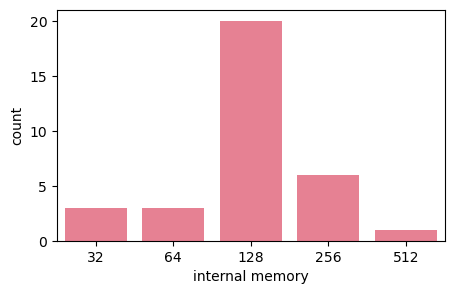

In [20]:
#Menghitung jumlah internal memory
internalMemory_counts = data['internal memory'].value_counts()
print(internalMemory_counts)

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['internal memory'])
plt.show()

Output kode di atas memberikan informasi :
- Terdapat lima kategori internal memory
- Kategori internal memory 128 memiliki jumlah terbanyak dengan total 20
- Kategori internal memory 512 memiliki jumlah tersedikit dengan total 1

#### 

#### Menghitung jumlah RAM untuk masing-masing kategori.

RAM
8     13
4      6
6      6
3      4
12     4
Name: count, dtype: int64


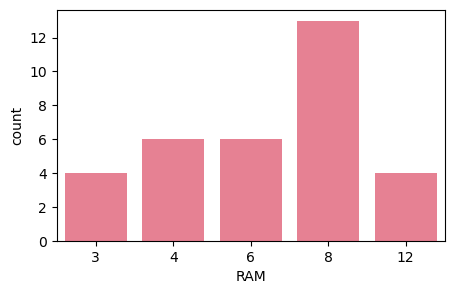

In [21]:
#Menghitung jumlah RAM
RAM_counts = data['RAM'].value_counts()
print(RAM_counts)

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['RAM'])
plt.show()

Output kode di atas memberikan informasi :
- Terdapat lima kategori RAM
- Kategori RAM 8 memiliki jumlah terbanyak dengan total 13
- Kategori RAM 3 dan RAM 12 memiliki jumlah tersedikit dengan total 4

#### 

#### Menampilkan analisis untuk kolom performance. Analisis dilakukan dengan membagi performance menjadi dua kategori karena nilai yang dimiliki sangat beragam.

Total data dengan performance > 5: 23
Total data dengan performance <= 5: 10


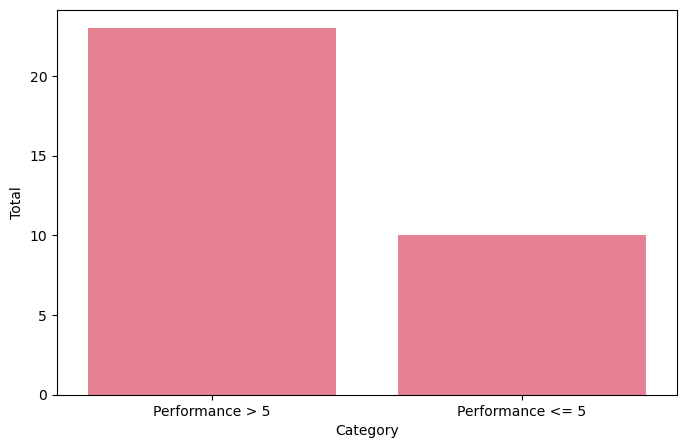

In [22]:
#Filter data berdasarkan performance
performance_above_5 = data[data['performance'] > 5]
performance_below_5 = data[data['performance'] <= 5]

#Menghitung total untuk setiap kategori
total_above_5 = len(performance_above_5)
total_below_5 = len(performance_below_5)

print('Total data dengan performance > 5:', total_above_5)
print('Total data dengan performance <= 5:', total_below_5)

#Data untuk plotting
performance_data = pd.DataFrame({
    'Category': ['Performance > 5', 'Performance <= 5'],
    'Total': [total_above_5, total_below_5]
})

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Total', data=performance_data)
plt.show()

Output kode di atas memberikan informasi :
- Cellphones yang memiliki performance lebih dari lima ada 23
- Cellphones yang memiliki performance kurang dari lima ada 10

#### 

#### Menghitung jumlah main camera untuk masing-masing kategori.

main camera
50     13
12     10
64      4
48      2
108     2
13      2
Name: count, dtype: int64


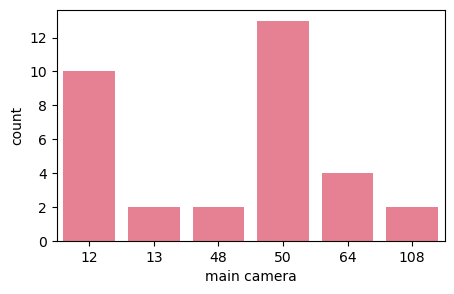

In [23]:
#Menghitung jumlah main camera
mainCamera_counts = data['main camera'].value_counts()
print(mainCamera_counts)

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['main camera'])
plt.show()

Output kode di atas memberikan informasi :
- Terdapat enam kategori main camera
- Kategori main camera 50 memiliki jumlah terbanyak dengan total 13
- Kategori main camera 13, 48, 108 memiliki jumlah tersedikit dengan total 2

#### 

#### Menghitung jumlah battery size.

battery size
5000    11
4500     4
4000     3
3300     1
4700     1
4800     1
5003     1
4410     1
4614     1
4400     1
2018     1
2438     1
3700     1
2942     1
4352     1
3065     1
3240     1
4600     1
Name: count, dtype: int64


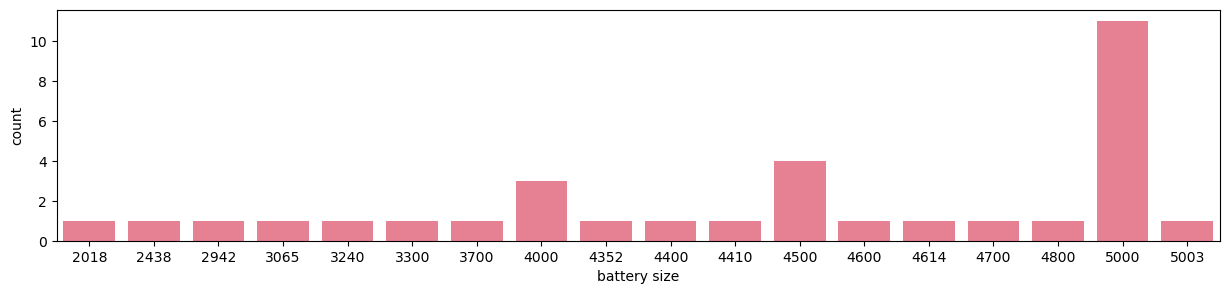

In [24]:
#Menghitung jumlah battery size
batterySize_counts = data['battery size'].value_counts()
print(batterySize_counts)

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(15, 3))
sns.countplot(data=data, x=data['battery size'])
plt.show()

Output kode di atas memberikan informasi :
- Terdapat 18 kategori battery size
- kategori battery size 5000 memiliki jumlah terbanyak dengan total 11

#### 

#### Menghitung jumlah screen size.

screen size
6.7    8
6.5    6
6.1    5
6.6    4
6.4    4
6.8    2
4.7    1
5.4    1
5.9    1
7.6    1
Name: count, dtype: int64


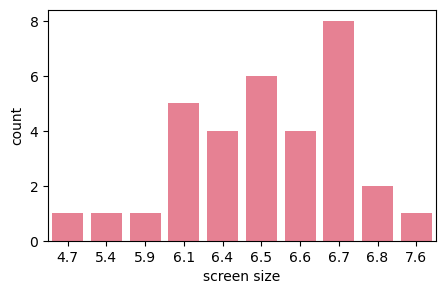

In [25]:
#Menghitung jumlah screen size
screenSize_counts = data['screen size'].value_counts()
print(screenSize_counts)

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data['screen size'])
plt.show()

Output kode di atas memberikan informasi :
- Terdapat sepuluh kategori screen size
- Kategori screen size 6.7 memiliki jumlah terbanyak dengan total 8

#### 

#### Menghitung jumlah weight.

27
weight
204    5
215    2
195    2
144    1
207    1
188    1
225    1
179    1
218    1
201    1
190    1
173    1
210    1
178    1
183    1
271    1
141    1
228    1
167    1
189    1
205    1
196    1
169    1
194    1
240    1
174    1
203    1
Name: count, dtype: int64


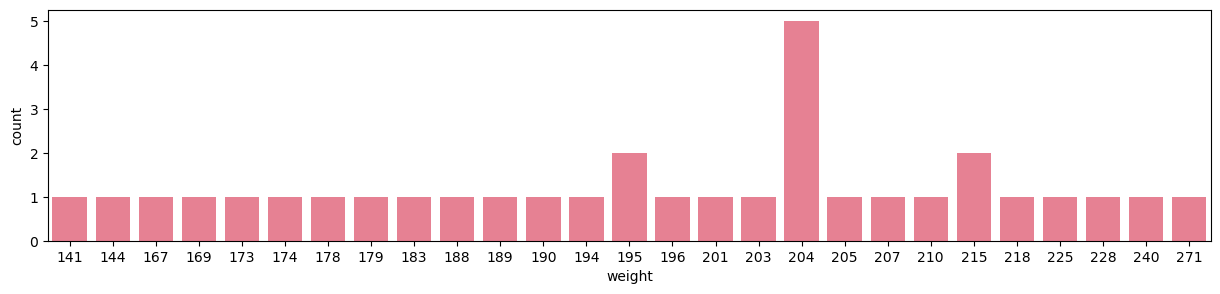

In [26]:
#Menghitung jumlah weight
weight_counts = data['weight'].value_counts()
print(len(weight_counts))
print(weight_counts)

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(15, 3))
sns.countplot(data=data, x=data['weight'])
plt.show()

Output kode di atas memberikan informasi :
- Terdapat 27 kategori weight
- Kategori weight 204 memiliki jumlah terbanyak dengan total 5

#### 

#### Melakukan analisis kolom release date dengan membagi data berdasarkan tahun.

release_year
2018     1
2025    32
Name: count, dtype: int64


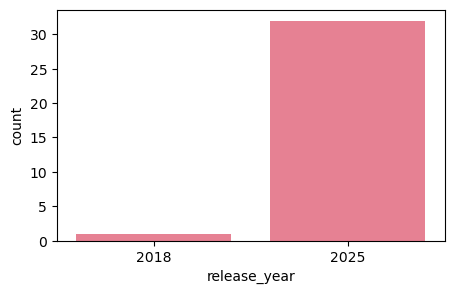

In [27]:
#Mengcopy dataset original
data_new = data.copy()

#Konversi kolom 'release date' ke tipe datetime
data_new['release date'] = pd.to_datetime(data['release date'], format='%d/%m/%Y')

# Ekstraksi tahun rilis
data_new['release_year'] = data_new['release date'].dt.year

# Hitung jumlah rilis per tahun
release_counts = data_new['release_year'].value_counts().sort_index()

print(release_counts)

#Menampilkan dalam bentuk grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=data, x=data_new['release_year'])
plt.show()

Output kode di atas memberikan informasi :
- Terdapat tiga kategori tahun
- Tahun 2025 memiliki jumlah terbanyak dengan total 16
- Tahun 2018 memiliki jumlah tersedikit dengan total 1

**Rating**

Mencari tahu masing-masing user melakukan review berapa kali dan mencari tahu apakah ada user yang melakukan jumlah review berbeda dari user lainnya.

In [28]:
#Menghitung masing-masing user melakukan review berapa kali
user_review_counts = rating['user_id'].value_counts()
print(user_review_counts)

#Mencari nilai unik untuk mencari tahu apakah ada user yang memiliki nilai berbeda
print("\n",user_review_counts.unique())

user_id
0      10
226    10
211    10
208    10
204    10
       ..
95     10
91     10
85     10
84     10
258    10
Name: count, Length: 99, dtype: int64

 [10]


Output kode di atas memberikan informasi :
- Masing-masing user melakukan review sebanyak sepuluh kali
- Semua user memiliki jumlah review yang sama yaitu sepuluh

Menghitung jumlah kemunculan cellphone yang diriview.


Jumlah kemunculan per cellphone_id:
 cellphone_id
0     20
1     24
2     27
3     29
4     34
5     31
6     30
7     29
8     39
9     29
10    27
11    22
12    32
13    32
14    27
15    38
16    31
17    30
18    31
19    31
20    30
21    20
22    30
23    24
24    35
25    38
26    28
27    34
28    26
29    25
30    41
31    31
32    35
Name: count, dtype: int64

Minimum: 20
Maximum: 41


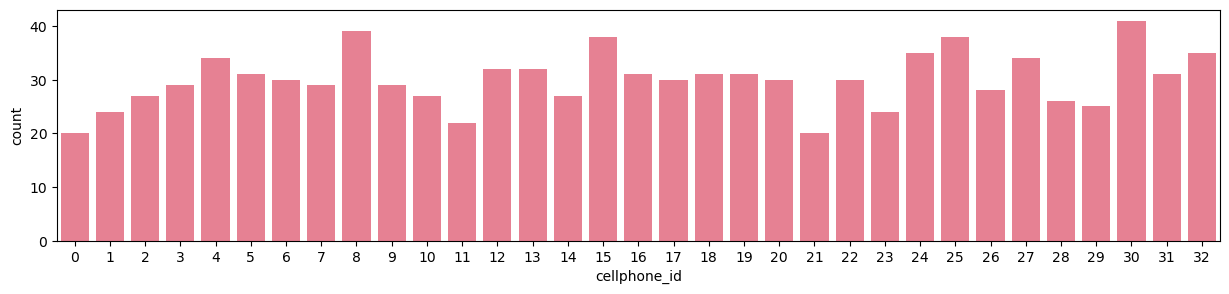

In [29]:
#Menghitung cellphone dengan id X muncul berapa kali
cellphone_review_counts = rating['cellphone_id'].value_counts()
print("\nJumlah kemunculan per cellphone_id:\n", cellphone_review_counts.sort_index())

#Menghitung nilai minimum dan maximum
print("\nMinimum:", cellphone_review_counts.min())
print("Maximum:", cellphone_review_counts.max())

#Menampilkan grafik
plt.figure(figsize=(15, 3))
sns.countplot(data=rating, x=rating['cellphone_id'])
plt.show()

Output kode di atas memberikan informasi :
- Cellphone paling banyak direview sebanyak 41 kali
- Cellphone paling sedikit direview sebanyak 20 kali

Menghitung jumlah rating.


Jumlah kemunculan per rating:
 rating
1      74
2      44
3      30
4      39
5      68
6     112
7     169
8     195
9     128
10    130
18      1
Name: count, dtype: int64


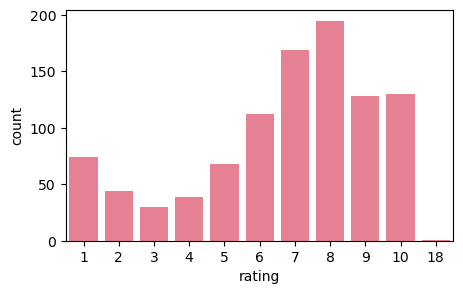

In [30]:
#Menghitung rating X muncul berapa kali
rating_counts = rating['rating'].value_counts()
print("\nJumlah kemunculan per rating:\n", rating_counts.sort_index())

#Menampilkan grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=rating, x=rating['rating'])
plt.show()

Output kode di atas memberikan informasi :
- Rating memiliki skala 0 - 10
- Rating terbanyak dengan nilai 8
- Rating tersedikit dengan nilai 3
- Terdapat outliers yaitu rating dengan nilai 18

**User**


Jumlah kemunculan age:
 age
21     1
23     1
25    12
27     3
28     3
29     5
30     6
31     4
32    10
33     5
34     3
35     3
36     1
37     4
38     5
39     3
40     2
41     2
42     4
43     1
45     1
46     3
48     2
49     2
50     5
55     1
56     2
57     1
58     2
61     2
Name: count, dtype: int64


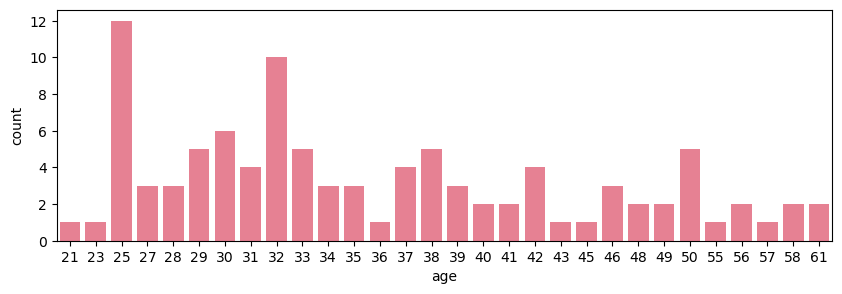

In [31]:
#Menghitung age X muncul berapa kali
age_counts = users['age'].value_counts()
print("\nJumlah kemunculan age:\n", age_counts.sort_index())

#Menampilkan grafik
plt.figure(figsize=(10, 3))
sns.countplot(data=users, x=users['age'])
plt.show()

Output kode di atas memberikan informasi :
- Usia paling tua dari user adalah 61
- Usia paling muda dari user adalah 21
- User dengan usia 25 memiliki jumlah paling banyak yaitu 12

Menghitung jumlah masing-masing kategori gender.


Jumlah kemunculan gender:
 gender
-Select Gender-     3
Female             46
Male               50
Name: count, dtype: int64


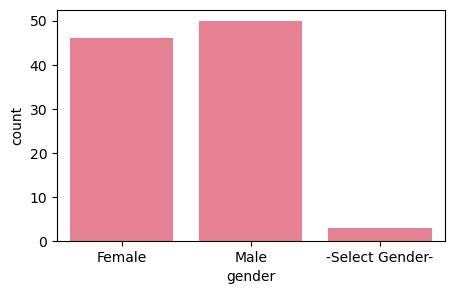

In [32]:
#Menghitung gender X muncul berapa kali
users_counts = users['gender'].value_counts()
print("\nJumlah kemunculan gender:\n", users_counts.sort_index())

#Menampilkan grafik
plt.figure(figsize=(5, 3))
sns.countplot(data=users, x=users['gender'])
plt.show()

Output kode di atas memberikan informasi :
- Gender female memiliki jumlah 46
- Gender male memiliki jumlah 50
- Terdapat outliers yaitu `-Select Gender-`

Menghitung jumlah occupation X muncul berapa kali.

In [33]:
#Menghitung occupation X muncul berapa kali
occupation_counts = users['occupation'].str.lower().value_counts()
print('Jumlah occupation: ',len(occupation_counts))
print("\nJumlah kemunculan occupation:\n", occupation_counts.sort_index())

Jumlah occupation:  45

Jumlah kemunculan occupation:
 occupation
accountant                           2
administrative officer               5
administrator                        1
banking                              1
business                             1
computer technician                  1
construction                         2
data analyst                         2
education                            2
executive                            1
executive manager                    1
finance                              2
healthare                            1
healthcare                           2
homemaker                            1
ict officer                          1
information                          1
information technology              12
it                                   6
manager                             18
marketing                            1
master degree                        1
nurse                                1
ops manager                          

Output kode di atas memberikan informasi :
- Terdapat 45 jenis pekerjaan
- Terdapat kesalahan penulisan pada `healthare`
- Pekerjaan `information technology` dan `it` dapat dijadikan satu

####

## Data Preprocessing

Menggabungkan dataset data, rating, dan users menjadi satu.

In [34]:
#Gabungkan cellphones_ratings dengan cellphones_data
ratings_data = pd.merge(rating, data, on='cellphone_id')

#Gabungkan hasil dengan cellphones_users
merged_data = pd.merge(ratings_data, users, on='user_id')

#Menampilkan dataset hasil merged
merged_data.head()

,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,age,gender,occupation
0,0,30,1,Motorola,Moto G Play (2025),Android,32,3,1.42,13,5,5000,6.5,204,159,14/01/2025,38,Female,Data analyst
1,0,5,3,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018,38,Female,Data analyst
2,0,10,9,Samsung,Galaxy S22,Android,128,8,8.81,50,10,3700,6.1,167,528,25/02/2025,38,Female,Data analyst
3,0,9,3,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2025,38,Female,Data analyst
4,0,23,2,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2025,38,Female,Data analyst


Melakukan cek missing value.

In [35]:
#Cek missing value
merged_data.isnull().sum()

user_id              0
cellphone_id         0
rating               0
brand                0
model                0
operating system     0
internal memory      0
RAM                  0
performance          0
main camera          0
selfie camera        0
battery size         0
screen size          0
weight               0
price                0
release date         0
age                  0
gender               0
occupation          10
dtype: int64

Output kode di atas memberikan informasi :
- Terdapat 10 missing value pada occupation

Menampilkan isi dari baris yang memiliki missing value.

In [36]:
#Menampilkan baris yang memiliki nilai null
rows_with_null = merged_data[merged_data.isnull().any(axis=1)]
print(rows_with_null)

     user_id  cellphone_id  rating     brand                 model  \
210       53            32       9  Motorola   Moto G Power (2025)   
211       53             5       8     Apple             iPhone XR   
212       53            15      10    Google             Pixel 6     
213       53             4       9     Apple     iPhone 13 Pro Max   
214       53            26       9    Xiaomi                12 Pro   
215       53             9       8   Samsung            Galaxy A53   
216       53             7       8   Samsung            Galaxy A13   
217       53            29       8  Motorola  Moto G Stylus (2025)   
218       53            25       9    Xiaomi               11T Pro   
219       53            17       8    Google          Pixel 6 Pro    

    operating system  internal memory  RAM  performance  main camera  \
210          Android               64    4         1.35           50   
211              iOS               64    3         4.22           12   
212          

Output kode di atas memberikan informasi :
- Seperti yang ditemukan saat univariate analysis bahwa terdapat outlier pada kolom gender yaitu `-Select Gender-` yang ternyata berhubungan dengan nilai occupation NaN
- Akan dilakukan drop

####

#### Drop missing value.

In [37]:
#Menghapus missing value
merged_data = merged_data.dropna()

####


Memastikan bahwa tidak terdapat missing value lagi.

In [38]:
#Cek missing value
merged_data.isnull().sum()

user_id             0
cellphone_id        0
rating              0
brand               0
model               0
operating system    0
internal memory     0
RAM                 0
performance         0
main camera         0
selfie camera       0
battery size        0
screen size         0
weight              0
price               0
release date        0
age                 0
gender              0
occupation          0
dtype: int64

Output kode di atas memberikan informasi :
- Sudah tidak terdapat missing value.

Berdasarkan univariate analysis terdapat outlier pada kolom rating, terdapat kesalahan tulis pada kolom occupation dan terdapat penyamaan nama pekerjaan pada kolom occupation.

In [39]:
#Drop rating 18
merged_data = merged_data[merged_data['rating'] != 18]

#Mengubah seluruh value occupation menjadi lowercase
merged_data['occupation'] = merged_data['occupation'].str.lower()

#Mengubah value 'healthare' pada kolom "occupation" menjadi 'healthcare'
merged_data['occupation'] = merged_data['occupation'].replace('healthare', 'healthcare')

#Mengubah value 'it' pada kolom "occupation" menjadi 'information technology'
merged_data['occupation'] = merged_data['occupation'].replace('it', 'information technology')

Menampilkan dataset yang sudah dibersihkan.

In [40]:
#Menampilkan dataset
cleaned_data = merged_data
cleaned_data

,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,age,gender,occupation
0,0,30,1,Motorola,Moto G Play (2025),Android,32,3,1.42,13,5,5000,6.5,204,159,14/01/2025,38,Female,data analyst
1,0,5,3,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018,38,Female,data analyst
2,0,10,9,Samsung,Galaxy S22,Android,128,8,8.81,50,10,3700,6.1,167,528,25/02/2025,38,Female,data analyst
3,0,9,3,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2025,38,Female,data analyst
4,0,23,2,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2025,38,Female,data analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,258,31,5,Motorola,Moto G Pure,Android,32,3,1.02,13,5,4000,6.5,188,129,14/10/2025,25,Male,executive manager
986,258,17,8,Google,Pixel 6 Pro,Android,128,12,7.19,50,11,5003,6.7,210,699,28/10/2025,25,Male,executive manager
987,258,23,9,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2025,25,Male,executive manager
988,258,27,8,Xiaomi,Poco F4,Android,128,8,6.98,64,20,4500,6.6,195,428,27/07/2025,25,Male,executive manager


####

# Data Preparation

Menghapus data duplikat sehingga cellphone hanya muncul satu kali.

In [41]:
#Menghapus data duplikat
cleaned_data = cleaned_data.drop_duplicates('cellphone_id')

Melakukan konversi data series menjadi list.

In [42]:
#Melakukan konversi data series menjadi list
cellphone_id = cleaned_data['cellphone_id'].tolist()
brand = cleaned_data['brand'].tolist()
model = cleaned_data['model'].tolist()
operating_system = cleaned_data['operating system'].tolist()

print(len(cellphone_id))
print(len(brand))
print(len(model))
print(len(operating_system))

33
33
33
33


Membuat dictionary untuk menentukan pasangan key-value.

Karena TF-IDF hanya cocok untuk data teks maka hanya kolom yang bertipe object saja yang dipilih.

In [43]:
#Membuat dictionary untuk menentukan pasangan key-value
phone_new = pd.DataFrame({
    'cellphone_id': cellphone_id,
    'brand': brand,
    'model': model,
    'operating_system': operating_system,
})

phone_new

,cellphone_id,brand,model,operating_system
0,30,Motorola,Moto G Play (2025),Android
1,5,Apple,iPhone XR,iOS
2,10,Samsung,Galaxy S22,Android
3,9,Samsung,Galaxy A53,Android
4,23,Vivo,X80 Pro,Android
5,8,Samsung,Galaxy A32,Android
6,22,Oppo,Find X5 Pro,Android
7,16,Google,Pixel 6a,Android
8,19,OnePlus,Nord 2T,Android
9,3,Apple,iPhone 13 Pro,iOS


#Model Development Dengan Content Based Filtering

Melakukan assign dataframe ke variabel baru yaitu data.

In [44]:
#Assign dataframe phone_new ke variabel data
data = phone_new

Membangun sistem rekomendasi.

In [45]:
#Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

#Melakukan perhitungan idf pada data brand
tf.fit(data['brand'])

#Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['apple', 'asus', 'google', 'motorola', 'oneplus', 'oppo',
       'samsung', 'sony', 'vivo', 'xiaomi'], dtype=object)

Melakukan fit dan transformasi ke bentuk matriks.

In [46]:
#Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['brand'])

#Melihat ukuran matrix tfidf
tfidf_matrix.shape

(33, 10)

Menghasilkan vektor TF-IDF dalam bentuk matriks.

In [47]:
#Menghasilkan vektor TF-IDF dalam bentuk matriks.
tfidf_matrix.todense()

matrix([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],


Melihat matriks TF-IDF untuk beberapa model dan brand.

In [48]:
#Menampilkan matriks TF-IDF untuk beberapa model dan brand.
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.model
).sample(10, axis=1).sample(10, axis=0)

,asus,oppo,vivo,apple,samsung,motorola,google,sony,xiaomi,oneplus
model,,,,,,,,,,
Pixel 6 Pro,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Galaxy S22 Plus,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Galaxy S22 Ultra,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Galaxy S22,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12 Pro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
iPhone 13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
iPhone 13 Mini,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Galaxy Z Flip 3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
iPhone SE (2025),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Menghitung derajat kesamaan (similarity degree) antar model dengan teknik cosine similarity.

In [49]:
#Menampilkan cosine_similatiry
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

Matriks kesamaan setiap model dengan menampilkan nama model dalam 33 sampel kolom (axis = 1) dan 10 sampel baris (axis=0).

In [50]:
#Membuat dataframe dari variabel cosine_sim
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['model'], columns=data['model'])
print('Shape:', cosine_sim_df.shape)

#Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(33, axis=1).sample(10, axis=0)

Shape: (33, 33)


model,11T Pro,iPhone XR,Moto G Stylus (2025),Xperia Pro,Moto G Play (2025),iPhone 13 Mini,Moto G Pure,10T,Pixel 6 Pro,X80 Pro,...,12 Pro,iPhone 13 Pro,Galaxy S22,Galaxy A13,Nord 2T,Poco F4,Nord N20,Galaxy A53,iPhone 13,Pixel 6a
model,,,,,,,,,,,,,,,,,,,,,
Redmi Note 11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Xperia Pro,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Find X5 Pro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Galaxy A13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
X80 Pro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Galaxy S22 Plus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
10 Pro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Galaxy Z Flip 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Membuat fungsi model_recommendations

In [51]:
def model_recommendations(model, similarity_data=cosine_sim_df, items=phone_new[['model','brand','operating_system']], k=4):
    #Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    #Dataframe diubah menjadi numpy
    #Range(start, stop, step)
    index = similarity_data.loc[:,model].to_numpy().argpartition(
        range(-1, -k, -1))

    #Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_model agar nama model yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(model, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Menampilkan hasil rekomendasi untuk `iPhone XR`

In [52]:
#Menampilkan hasil rekomendasi
model_recommendations('iPhone XR')

,model,brand,operating_system
0,iPhone 13,Apple,iOS
1,iPhone 13 Mini,Apple,iOS
2,iPhone SE (2025),Apple,iOS
3,iPhone 13 Pro,Apple,iOS


Menampilkan hasil rekomendasi untuk `Galaxy S22`

In [53]:
#Menampilkan hasil rekomendasi
model_recommendations('Galaxy S22')

,model,brand,operating_system
0,Galaxy Z Flip 3,Samsung,Android
1,Galaxy S22 Plus,Samsung,Android
2,Galaxy Z Fold 3,Samsung,Android
3,Galaxy A32,Samsung,Android


####

# Model Model Development dengan Collaborative Filtering

Menyimpan dataset rating yang sudah pernah diread di variabel df.

In [54]:
#Membaca dataset
df = rating
df

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2
...,...,...,...
985,258,31,5
986,258,17,8
987,258,23,9
988,258,27,8


Menyandikan (encode) fitur user_id.

In [77]:
#Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
print('list userID: ', user_ids)

#Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

#Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [0, 1, 6, 8, 10, 12, 16, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37, 38, 52, 53, 56, 60, 74, 79, 80, 84, 85, 91, 95, 98, 99, 100, 104, 105, 106, 110, 111, 112, 113, 114, 115, 116, 119, 120, 123, 124, 126, 128, 129, 137, 140, 142, 143, 144, 145, 148, 152, 154, 156, 160, 162, 164, 169, 178, 183, 194, 200, 203, 204, 208, 211, 215, 226, 227, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 242, 243, 244, 245, 246, 251, 252, 253, 254, 255, 256, 257, 258]
encoded userID :  {0: 0, 1: 1, 6: 2, 8: 3, 10: 4, 12: 5, 16: 6, 24: 7, 25: 8, 26: 9, 27: 10, 28: 11, 29: 12, 30: 13, 32: 14, 33: 15, 35: 16, 36: 17, 37: 18, 38: 19, 52: 20, 53: 21, 56: 22, 60: 23, 74: 24, 79: 25, 80: 26, 84: 27, 85: 28, 91: 29, 95: 30, 98: 31, 99: 32, 100: 33, 104: 34, 105: 35, 106: 36, 110: 37, 111: 38, 112: 39, 113: 40, 114: 41, 115: 42, 116: 43, 119: 44, 120: 45, 123: 46, 124: 47, 126: 48, 128: 49, 129: 50, 137: 51, 140: 52, 142: 53, 143: 54, 144: 55, 145: 56, 148: 57, 152: 58, 154: 59, 156: 60, 160: 6

Menyandikan (encode) fitur cellphone_id.

In [78]:
#Mengubah cellphone_id menjadi list tanpa nilai yang sama
cellphone_ids = df['cellphone_id'].unique().tolist()

#Melakukan proses encoding cellphone_id
cellphone_to_cellphone_encoded = {x: i for i, x in enumerate(cellphone_ids)}

#Melakukan proses encoding angka ke cellphone_id
cellphone_encoded_to_cellphone = {i: x for i, x in enumerate(cellphone_ids)}

Mapping user_id dan cellphone_id.

In [79]:
#Mapping user_id ke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)

#Mapping cellphone_id ke dataframe cellphone
df['cellphone'] = df['cellphone_id'].map(cellphone_to_cellphone_encoded)

Menampilkan jumlah user dan cellphone.

Menampilkan nilai minimum dan maximum dari rating.

In [81]:
#Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

#Mendapatkan jumlah cellphone
num_cellphone = len(cellphone_to_cellphone_encoded)
print(num_cellphone)

#Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

#Nilai minimum rating
min_rating = min(df['rating'])

#Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of cellphone: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_cellphone, min_rating, max_rating
))

99
33
Number of User: 99, Number of cellphone: 33, Min Rating: 1.0, Max Rating: 18.0


Output kode di atas memberikan informasi :
- Terdapat outliers pada fitur rating yaitu value '18'
- Outlier tersebut harus di drop

Drop baris dengan value pada kolom rating 18.

In [82]:
#Drop data
df = df[df['rating'] != 18]

Memastikan kembali tidak ada nilai max yang melebihi 10.

In [83]:
#Nilai minimum rating
min_rating = min(df['rating'])

#Nilai maksimal rating
max_rating = max(df['rating'])

print('Min Rating: {}, Max Rating: {}'.format(
    min_rating, max_rating
))

Min Rating: 1.0, Max Rating: 10.0


Melakukan acak terhadap dataset.

In [84]:
#Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,user_id,cellphone_id,rating,user,cellphone
213,53,4,9.0,21,16
331,100,27,9.0,33,19
501,129,4,8.0,50,16
309,95,5,5.0,30,1
88,25,16,9.0,8,7
...,...,...,...,...,...
106,27,6,8.0,10,27
270,84,25,1.0,27,21
860,242,24,4.0,86,30
435,116,13,1.0,43,17


#### Memetakan (mapping) data user dan cellphone menjadi satu value.

Mebagi data train dan validasi dengan komposisi 80:20.

In [85]:
#Membuat variabel x untuk mencocokkan data user dan cellphone menjadi satu value
x = df[['user', 'cellphone']].values

#Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

#Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[21 16]
 [33 19]
 [50 16]
 ...
 [86 30]
 [43 17]
 [10  8]] [0.88888889 0.88888889 0.77777778 0.44444444 0.88888889 0.66666667
 0.         0.88888889 0.55555556 0.66666667 1.         0.22222222
 0.88888889 1.         0.66666667 0.88888889 0.55555556 0.66666667
 0.77777778 0.77777778 0.44444444 0.11111111 0.66666667 0.55555556
 0.66666667 0.22222222 0.55555556 0.55555556 0.77777778 0.55555556
 0.11111111 0.77777778 0.77777778 0.88888889 0.44444444 0.55555556
 0.22222222 0.66666667 0.33333333 0.88888889 0.66666667 0.11111111
 0.55555556 0.77777778 0.77777778 0.55555556 0.88888889 0.88888889
 0.66666667 0.88888889 0.44444444 1.         1.         0.55555556
 0.55555556 0.77777778 0.55555556 0.66666667 0.44444444 0.88888889
 0.33333333 0.77777778 0.66666667 0.         0.33333333 0.77777778
 0.77777778 0.77777778 0.55555556 0.44444444 0.66666667 0.66666667
 0.44444444 0.66666667 1.         0.66666667 1.         0.88888889
 0.66666667 1.         0.88888889 0.88888889 0.11111111 0.77777778
 0

Membuat class recommenderNet.

In [86]:
import tensorflow as tf
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_cellphone, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_cellphone = num_cellphone
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.cellphone_embedding = layers.Embedding( # layer embeddings cellphone
        num_cellphone,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.cellphone_bias = layers.Embedding(num_cellphone, 1) # layer embedding cellphone bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    cellphone_vector = self.cellphone_embedding(inputs[:, 1]) # memanggil layer embedding 3
    cellphone_bias = self.cellphone_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_cellphone = tf.tensordot(user_vector, cellphone_vector, 2)

    x = dot_user_cellphone + user_bias + cellphone_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Melakukan inisialisasi model dan compile.

In [87]:
model = RecommenderNet(num_users, num_cellphone, 50) #inisialisasi model

#model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

####

## Melakukan training terhadap model.

In [88]:
#Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7298 - root_mean_squared_error: 0.3390 - val_loss: 0.6934 - val_root_mean_squared_error: 0.3094
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7037 - root_mean_squared_error: 0.3299 - val_loss: 0.6930 - val_root_mean_squared_error: 0.3091
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6892 - root_mean_squared_error: 0.3118 - val_loss: 0.6888 - val_root_mean_squared_error: 0.3062
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6863 - root_mean_squared_error: 0.3120 - val_loss: 0.6854 - val_root_mean_squared_error: 0.3041
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6658 - root_mean_squared_error: 0.2959 - val_loss: 0.6857 - val_root_mean_squared_error: 0.3042
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6829 - root_mean_squared_error: 0.3098 - val_loss: 0.6850 - val_root_mean_squared_error: 0.3037
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6463 - ro

####

## Menampilkan grafik proses training.

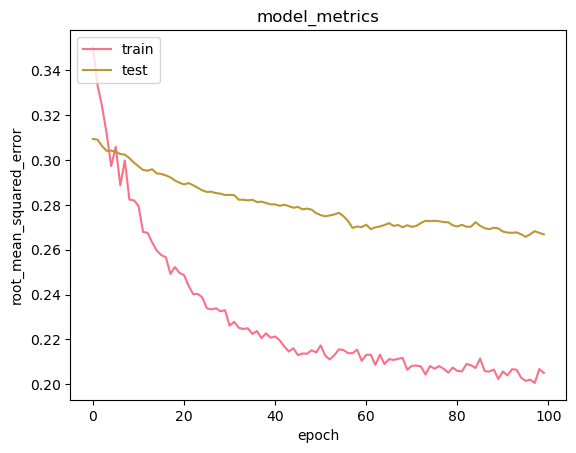

In [89]:
#Menampilkan grafik traning vs test
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

####

#### Membuat variabel cellhpone_not_reviewed sebagai daftar cellphone untuk direkomendasikan pada pengguna.

In [90]:
phone_df = phone_new
df = pd.read_csv('rating.csv')

#Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
cellphone_reviewed_by_user = df[df.user_id == user_id]

cellphone_not_reviewed = phone_df[~phone_df['cellphone_id'].isin(cellphone_reviewed_by_user.cellphone_id.values)]['cellphone_id']
cellphone_not_reviewed = list(
    set(cellphone_not_reviewed)
    .intersection(set(cellphone_to_cellphone_encoded.keys()))
)

cellphone_not_reviewed = [[cellphone_to_cellphone_encoded.get(x)] for x in cellphone_not_reviewed]
user_encoder = user_to_user_encoded.get(user_id)
user_cellphone_array = np.hstack(
    ([[user_encoder]] * len(cellphone_not_reviewed), cellphone_not_reviewed)
)

####

## Meperoleh hasil rekomendasi cellphone.

In [91]:
ratings = model.predict(user_cellphone_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_cellphone_ids = [
    cellphone_encoded_to_cellphone.get(cellphone_not_reviewed[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('cellphone with high ratings from user')
print('----' * 8)

top_cellphone_user = (
    cellphone_reviewed_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .cellphone_id.values
)

cellphone_df_rows = phone_df[phone_df['cellphone_id'].isin(top_cellphone_user)]
for row in cellphone_df_rows.itertuples():
    print(row.brand, ':', row.model)

print('----' * 8)
print('Top 10 cellphone recommendation')
print('----' * 8)

recommended_cellphone = phone_df[phone_df['cellphone_id'].isin(recommended_cellphone_ids)]
for row in recommended_cellphone.itertuples():
    print(row.brand, ':', row.model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Showing recommendations for users: 244
cellphone with high ratings from user
--------------------------------
OnePlus : Nord 2T
Xiaomi : 11T Pro
OnePlus : 10 Pro
Samsung : Galaxy S22 Ultra
Xiaomi : Redmi Note 11
--------------------------------
Top 10 cellphone recommendation
--------------------------------
Samsung : Galaxy S22
Vivo : X80 Pro
Oppo : Find X5 Pro
Apple : iPhone 13 Pro
Sony : Xperia Pro
Google : Pixel 6  
Apple : iPhone 13 Pro Max
Apple : iPhone 13 Mini
Xiaomi : 12 Pro
Apple : iPhone 13
